In [1]:
import os

import matplotlib.pyplot as plt
import geopandas as gpd

import mplleaflet



In [2]:
%matplotlib notebook

In [3]:
df = gpd.read_file('nws_precip_1day_observed_20160728.shp')

In [4]:
df[:5]

,GLOBVALUE,HRAPX,HRAPY,ID,LAT,LON,UNITS,geometry
0,0.19,528,10,514,24.8285,-100.4168,Inches,POINT (-100.4167722364475 24.82847994234514)
1,0.21,529,10,515,24.8259,-100.3810,Inches,POINT (-100.3809802973877 24.82586570105455)
2,0.31,530,10,516,24.8232,-100.3452,Inches,POINT (-100.3451919707907 24.82323124609768)
3,0.39,531,10,517,24.8206,-100.3094,Inches,POINT (-100.3094072840312 24.82057658234637)
4,0.42,532,10,518,24.8179,-100.2736,Inches,POINT (-100.2736262644675 24.81790171470898)


In [5]:
df.rename(columns=lambda x: x.lower(), inplace=True)
df = df[df['globvalue'] > 0]


In [6]:
df[:5]

,globvalue,hrapx,hrapy,id,lat,lon,units,geometry
0,0.19,528,10,514,24.8285,-100.4168,Inches,POINT (-100.4167722364475 24.82847994234514)
1,0.21,529,10,515,24.8259,-100.3810,Inches,POINT (-100.3809802973877 24.82586570105455)
2,0.31,530,10,516,24.8232,-100.3452,Inches,POINT (-100.3451919707907 24.82323124609768)
3,0.39,531,10,517,24.8206,-100.3094,Inches,POINT (-100.3094072840312 24.82057658234637)
4,0.42,532,10,518,24.8179,-100.2736,Inches,POINT (-100.2736262644675 24.81790171470898)


In [7]:
df.set_index(['hrapy', 'hrapx'], inplace=True)
df = df.unstack()


In [8]:
df.head()

globvalue                                                        ...   \
hrapx     -289  -288  -287  -286  -279  -278  -277  -276  -275  -274   ...    
hrapy                                                                  ...    
10          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
11          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
12          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
13          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    
14          NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    

      geometry                                                        
hrapx     1577  1578  1579  1580  1581  1582  1583  1584  1585  1586  
hrapy                                                                 
10        None  None  None  None  None  None  None  None  None  None  
11        None  None  None  None  None  None  None  None  None  None  
12        None  None  None  None  None  None  None  None  None  None  
13        None  None  None  None  None  None  None  None  None  None  
14        None  None  None  None  None  None  None  None  None  None  

[5 rows x 8532 columns]

In [9]:
df.sort_index(axis=0, inplace=True)
df.sort_index(axis=1, inplace=True)


In [10]:
g = df['globvalue']

In [11]:
g[:5]

hrapx,-289,-288,-287,-286,-279,-278,-277,-276,-275,-274,...,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586
hrapy,,,,,,,,,,,,,,,,,,,,,
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
4762.5 * (g.columns.values - 401)

array([-3286125. , -3281362.5, -3276600. , ...,  5634037.5,  5638800. ,
        5643562.5])

<IPython.core.display.Javascript object>


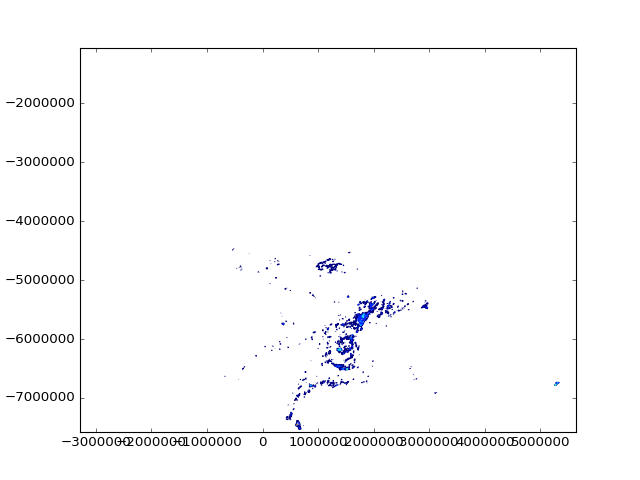

In [12]:

plt.contour(4762.5 * (g.columns.values - 401), 
            4762.5 * (g.index.values - 1601), g)


In [13]:
# See http://www.nws.noaa.gov/oh/hrl/distmodel/hrap.htm
# Note: The Proj.4 CRS definition below is gleaned from reading the NWS and
# Proj.4 docs. Reach out if it's not correct although the resulting map looks
# right.
crs = {'lon_0': -105.0,
       'lat_ts': 60.0,
       'R': 6371200,
       'proj': 'stere',
       'units': 'm',
       'lat_0': 90.0}



In [14]:
#root, ext = os.path.splitext(__file__)
mapfile = 'map.html'
mplleaflet.show(crs=crs, path=mapfile, tiles='mapbox bright')

In [15]:
from netCDF4 import Dataset
from grid import *
from dep import *

In [16]:
grd=Grid.fromfile('/home/critechuser/tmp/20131101.12/med.grd')

In [17]:
bath=Dep.read('/home/critechuser/tmp/20131101.12/med.dep',grd.shape)

In [18]:
b=bath.val[:-1,:-1]

In [24]:
from mpl_toolkits.basemap import pyproj
from mpl_toolkits.basemap import Basemap


In [27]:
lon=[grd.x.min(),grd.x.max()]
lat=[grd.y.min(),grd.y.max()]

In [33]:
core=[grd.x.mean(),grd.y.mean()]

<IPython.core.display.Javascript object>


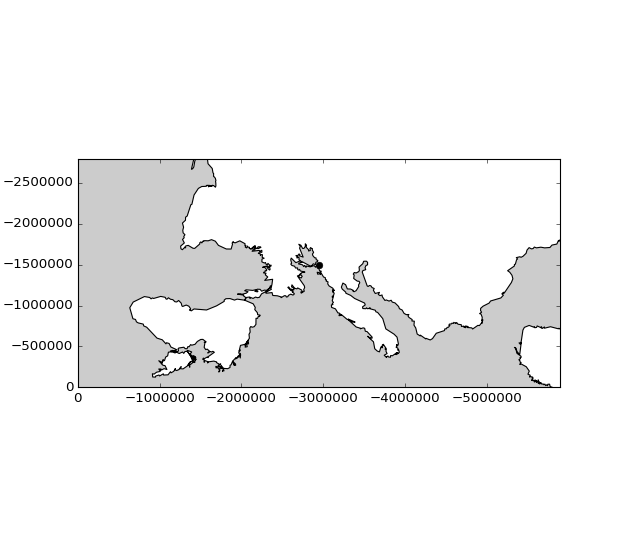

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))
m = Basemap(projection='merc',
              urcrnrlat=lat[0], llcrnrlat=lat[1],
              urcrnrlon=lon[0], llcrnrlon=lon[1],
              resolution='l',
              suppress_ticks=False,
              ax=ax)
m.fillcontinents()
m.drawcoastlines()
m.ax = ax
pt = m.plot(core[0], core[1], 'ko', latlon=True)


In [37]:
lons, lats, xs, ys = m.makegrid(200, 200, returnxy=True)

In [38]:
gc = pyproj.Geod(a=m.rmajor, b=m.rminor)

In [41]:
distances = np.zeros(lons.size)

In [42]:
for k, (lo, la) in enumerate(zip(lons.flatten(), lats.flatten())):
    _, _, distances[k] = gc.inv(core[0], core[1], lo, la)
    
distances = distances.reshape(200, 200)  # In km.

# Plot perimeters of equal distance.
levels = [1000]  # [50, 100, 150]
cs = m.contour(xs, ys, distances, levels, colors='r')

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftdata
method to adjust the data to be consistent with the map projection
region (see examples/shiftdata.py).

In [46]:
m.rminor

6370997.0

In [44]:
xs.shape

(200, 200)

In [47]:
from pyproj import Proj

In [48]:
myProj = Proj("+proj=utm +zone=5K, +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

In [50]:
[xx,yy]=myProj(grd.x,grd.y)

<IPython.core.display.Javascript object>


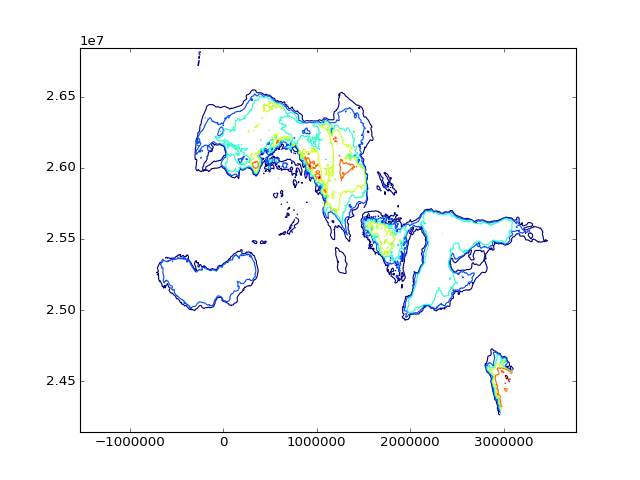

In [55]:
plt.contour(xx,yy,b)

In [20]:
# See http://www.nws.noaa.gov/oh/hrl/distmodel/hrap.htm
# Note: The Proj.4 CRS definition below is gleaned from reading the NWS and
# Proj.4 docs. Reach out if it's not correct although the resulting map looks
# right.
crs = {'lon_0': -105.0,
       'lat_ts': 60.0,
       'R': 6371200,
       'proj': 'stere',
       'units': 'm',
       'lat_0': 90.0}



In [56]:
#root, ext = os.path.splitext(__file__)
mapfile = 'map.html'
mplleaflet.show(crs=crs, path=mapfile, tiles='mapbox bright')